## Otimização de Carga com Algoritmo Genético

# Importando bibliotecas




<h5>

geneticalgorithm: Library that implements genetic algorithms for optimization.

Os algoritmos genéticos funcionam de forma a criar clones de uma hipótese para encontrar o melhor resulado.

Imagine que você precisa descobrir a melhor maneira de minerar um mineral, extrair petróleo ou colher trigo, maximizando produção e reduzindo custos.
O algoritmo genético gera várias possibilidades (população inicial) e evolui através de iterações, testando combinações inteligentes sem avaliar todas as opções. Ele retorna a melhor solução em formato numérico (ex: 5 caminhões, 200 psi) ou booleano ('sim/não'), simulando eficiência sem testes físicos caros.

Utilidade:
Repete ciclos (gerações) para aprimorar soluções, descartando as piores e recombinando as melhores.
Ao definir variáveis da operação com máximo e mínimo vai delimitar limites (variável boundaries) para evitar as soluções absurdas. Ex: Pressão de extração de petróleo não pode ser negativa, Número de caminhões não pode ser 10.000 se a frota tem só 50.
Tamanho da população configura quantas soluções são geradas por vez (ex: 50).
Taxa de mutação configura a chance de alterações aleatórias (ex: 1% para evitar soluções repetitivas).
Número máximo de iterações configura como Critério de parada (ex: 100 gerações finaliza a otimização).

O Gráfico: 
Mostra a linha decrescente indicando que o GA está encontrando soluções melhores a cada geração. Exemplo: Eixo X = gerações, Eixo Y = custo (quanto menor, melhor).

Onde usar:
Logística: Define rotas ideais sem simular todas.
Agricultura: Ajusta equipamentos e plantio em grandes áreas.
Petróleo: Otimiza extração sem riscos de testes reais.

Essência: Em todos os casos, o algoritmo genético substitui tentativa e erro por evolução dirigida, entregando a melhor solução prática sem gastos desnecessários.</h5>

<h6>

---

Exemplo Agricultura: 
Você é um agricultor que quer testar novas técnicas para aumentar a produtividade do trigo. Hoje, seus campos usam:
Espaçamento: 25 cm entre sementes
Irrigação: 10h da manhã
Rotas de colheita: linha reta

Resultado atual: 5 toneladas/hectare, gastando 5000 litros de água e 20 litros de diesel por hectare.

Seu funcionário pega esses dados e simula 10.000 combinações diferentes no computador, variando:
Espaçamento: de 15 a 30 cm
Horário de irrigação: de 0h às 23h
Rotas: zigue-zague, circular e em grade

Após 2 horas de simulação, ele traz os resultados ideais para o próximo plantio:
Espaçamento: 18 cm
Irrigação: 3h da manhã
Rota: zigue-zague

Resultado projetado: 5,8 toneladas/hectare (+16%), com 4200 litros de água (-16%) e 17 litros de diesel (-15%) por hectare.

No futuro, esse mesmo sistema poderá:
Usar dados em tempo real do solo e clima para ajustar automaticamente a irrigação
Integrar preços de combustível e água para calcular o custo-benefício em tempo real
Testar novas sementes geneticamente modificadas em simulação antes do plantio real

A cada safra, o algoritmo aprende com os novos dados e sugere ajustes ainda mais precisos - tornando sua fazenda cada vez mais eficiente sem precisar de adivinhação ou tentativa e erro. 

---

Exemplo Petróleo:

Imagine que você é um engenheiro de petróleo responsável por um campo maduro no mar. Atualmente, seus poços operam com:
Pressão de injeção de água: 2.500 psi
Vazão por poço: 800 barris/dia
Configuração atual: 5 poços produtores e 2 injetores

Resultado atual: 4.000 barris/dia com custo de US$ 15/baril

Você precisa aumentar a produção para 4.500 barris/dia, mas cada teste físico no campo custa US$ 500 mil e leva 3 meses. Enquanto você planeja os próximos testes, um analista de dados sugere simular diferentes configurações usando um algoritmo genético.
Ele coleta os dados históricos do campo:
Performance de 20 poços nos últimos 5 anos
Dados de pressão, vazão e custos operacionais
Limites operacionais de segurança

O algoritmo testa 50.000 combinações em 6 horas, variando:
Pressão de injeção (2.000-3.000 psi)
Número de poços injetores (1-4)
Vazão por poço (500-1.200 barris/dia)

A solução ideal encontrada:
Aumentar pressão para 2.800 psi
Ativar 1 poço injetor adicional (total 3)
Ajustar vazão para 950 barris/dia nos poços principais
Resultado projetado: 4.600 barris/dia (+15%) com custo reduzido para US$ 13/baril

Implementação no campo confirma os resultados em 2 meses, com economia de US$ 2 milhões em testes desnecessários.

---

Exemplo logística de transportes:
Você é o gerente de uma frota com 50 caminhões. Hoje, seus motoristas gastam 6 horas planejando rotas manualmente, resultando em:
30% dos veículos rodando com carga pela metade
20% das entregas atrasadas
Custo diário: R$ 35.000

Seu analista de dados propõe uma solução:
Coletamos a Localização de 120 clientes, Horários de entrega, Capacidade de cada caminhão

O algoritmo genético testa 500.000 combinações em 3 horas e encontra:
Rotas que reduzem a quilometragem média de 380km para 290km por veículo
Taxa de ocupação dos caminhões aumenta de 70% para 92%
Atrasos caem para 5%

Resultado após 1 mês:
Economia de R$ 8.500/dia
2 horas diárias salvas no planejamento
Redução de 15% no consumo de diesel

Próximo passo: Integrar com o GPS em tempo real para ajustar rotas conforme o trânsito.


---
A seguir um teste simples desta otimização, considerando que é com uma base de dados fictícia, de logística;

</h6>


In [ ]:
# Command to install Python packages directly on the notebook.
!pip install geneticalgorithm



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
# pandas: Manipula os dados de entrada (lista de itens).
import pandas as pd

# geneticalgorithm: Implementa o algoritmo genético.
from geneticalgorithm import geneticalgorithm as ga

Data

In [ ]:
"""
Carrega os dados dos itens a serem transportados (peso, volume, valor).
Ter a base de inputs para a função de otimização.

"""

data = pd.read_csv("Itens.csv", sep=";")

# roda a tabela
data

,ID,PESO,VALOR,VOLUME
0,1,342,1136,32
1,2,305,5349,48
2,3,442,8487,26
3,4,944,4190,25
4,5,881,6644,47
5,6,183,3068,15
6,7,315,6675,40
7,8,450,5529,27
8,9,111,5905,40
9,10,676,7936,50


Summary Statistics: basic view

In [ ]:
"""
reg: Calcula o número total de itens no arquivo Itens.csv usando len(data).
    Define a dimensão do problema: o algoritmo genético criará soluções com len(data) variáveis binárias (uma por item).
    Impacta diretamente no tempo de processamento: mais itens = mais combinações possíveis.
    Se houver 100 itens, o algoritmo testará combinações de 100 variáveis (0 ou 1 para cada item).

sum_weight: Soma o peso de todos os itens da lista.
    Contextualiza a restrição: Compara o peso total disponível (data['PESO'].sum()) com a capacidade do caminhão (sobra_peso = 6000 kg).
    Se o peso total for menor que a capacidade, a solução ótima é trivial (levar tudo).
    Se for maior (como no caso), justifica a necessidade do algoritmo.
    Peso total = 8.000 kg > capacidade (6.000 kg) → algoritmo precisa escolher os itens mais valiosos que caibam no limite.

sum_vol: Soma o volume de todos os itens. Similar ao peso, mas para volume.
Mostra se a restrição de volume (sobra_volume = 350 m³) será crítica.
Se o volume total for menor que a capacidade, o problema se reduz a otimizar apenas por peso.
Volume total = 400 m³ > capacidade (350 m³) → algoritmo precisa balancear peso e volume.

sum_value: Calcula o valor monetário total de todos os itens combinados.
Estabelece o valor máximo teórico (se todos os itens fossem transportados).
Serve como referência para avaliar a qualidade da solução encontrada:
Se o valor total é R$ 100.000 e a solução ótima é R$ 82.500, você perdeu R$ 17.500 devido às restrições.
Ajuda a identificar se vale a pena aumentar a capacidade (comprar mais caminhões).

"""

print(f"reg: {len(data)}")
print(f"sum_weight:{data['PESO'].sum()}")
print(f"sum_vol{data['VOLUME'].sum()}")
print(f"sum_value{data['VALOR'].sum()}")

reg: 20
sum_weight:9205
sum_vol649
sum_value115609


Variables: Constraints

In [ ]:
""" 
sur_weight: Define o limite máximo de peso que o caminhão pode transportar (6.000 kg).
    Restrição física: O algoritmo descartará qualquer combinação de itens cujo peso total exceda 6.000 kg.
    Se total_weight > sur_weight → retorna -1 (solução inválida).
    Caso contrário → calcula o valor total dos itens.
    Se uma combinação de itens soma 6.500 kg → rejeitada automaticamente.

sur_volume: Define o limite máximo de volume que o caminhão pode carregar (350 m³).
    Restrição física complementar: Além do peso, o volume também deve ser respeitado.
    Priorização de itens: Itens com alto valor e baixo volume terão vantagem.
    Se uma combinação tem 300 kg (dentro do peso) mas ocupa 400 m³ → inválida.

iteration: Define o número máximo de gerações que o algoritmo genético executará.
    Controle de tempo/computação:
    Mais iterações = melhor qualidade da solução, mas maior tempo de processamento.
    Menos iterações = resultado mais rápido, porém menos refinado.
    Critério de parada: O algoritmo encerra após 10 gerações, mesmo sem convergência total.
    Com iteration=10, o algoritmo testará 10 gerações de soluções (ex: 100 soluções por geração).
    Se a solução já estiver estável (sem melhorias), pode parar antes.

"""

sur_weight = 6000 #Kg
sur_volume = 350 #m³
iteration = 10


Function: Assessment/Adjustment

In [ ]:
def fitness_function(x, data, max_volume, max_weight):
    
    """Avalia uma solução de seleção de carga.
    
    Esta função calcula a qualidade de uma solução para o problema de seleção de itens.
    Soluções que excedem o volume ou peso máximo são penalizadas, enquanto soluções válidas
    são avaliadas pelo valor total (com sinal invertido para minimização).

    Parâmetros:
        x (numpy.ndarray): Vetor binário representando a seleção de itens (0 = excluído, 1 = incluído)
        dados (pd.DataFrame): DataFrame com colunas:
            - 'PESO': Peso do item
            - 'VOLUME': Volume do item
            - 'VALOR': Valor do item
        volume_max (float): Capacidade máxima de volume
        peso_max (float): Capacidade máxima de peso

    Retorna:
        float: Pontuação de aptidão onde:
            -  -1.0 para soluções inválidas
            - Valor total negativo para soluções válidas
        
    Exemplo:
            solucao = [1, 0, 1]  # Seleciona itens 0 e 2
            funcao_aptidao(solucao, df_itens, 500, 300)
            -4200.75  # Solução válida com valor total 4200.75
    """
    
    select_regs = data.iloc[x.astype(bool),:]
    TT_weight = select_regs['PESO'].sum()
    TT_vol = select_regs['VOLUME'].sum()
    
    if TT_weight > max_weight or TT_vol > max_volume:
        return -1
    else:
        return -select_regs['VALOR'].sum()

Set: Genetic Algorithm 

In [ ]:
"""
Configuração de Parâmetros para Algoritmo Genético

Este bloco define os parâmetros operacionais e limites de busca para
um algoritmo genético aplicado a problemas de otimização combinatória.

Variáveis:
    algorithm_param (dict): Dicionário contendo parâmetros de controle
        do algoritmo genético com os seguintes elementos:
        Número máximo de gerações
        Tamanho da população por geração
        Probabilidade de mutação [0-1]
        Fração de elite preservada [0-1]
        Probabilidade de cruzamento [0-1]
        Porção de pais selecionáveis [0-1]
        Estratégia de cruzamento
        Critério de parada por estagnação
    
    varbound (list): Lista de limites para variáveis de decisão,
        onde cada elemento é uma lista [limite_inferior, limite_superior].
        Para seleção binária: [0, 1] para cada item.
        
"""

algorithm_param = { 
    'max_num_iteration': iteration, 
    'population_size': 100,
    'mutation_probability': 0.1,
    'elit_ratio': 0.01,
    'crossover_probability': 0.5,
    'parents_portion': 0.3,
    "crossover_type": 'uniform',
    'max_iteration_without_improv': None  
}

varbound = [[0, 1]] * len(data)

Set: Model

In [73]:
"""    
    Inicializa o algoritmo genético (GA) para otimização binária.
    
    Parâmetros:
        function (lambda): Função de avaliação que recebe:
            x (array): Solução candidata
            data: Conjunto de dados de entrada
            sur_volume: Restrição de volume máximo
            sur_weight: Restrição de peso máximo
        dimension (int): Número de genes = tamanho do dataset
        variable_type (str): 'bool' para representação binária
        variable_boundaries: Limites das variáveis (aqui deve ser None ou [False,True] para bool)
        algorithm_parameters: Dict com:
            - max_num_iteration (int)
            - population_size (int)
            - mutation_probability (float)
            - elit_ratio (float)
            - crossover_probability (float)
            - parents_portion (float)
            - crossover_type (str)
            - max_iteration_without_improv (int)
    """

model = ga(    
    function=lambda x: fitness_function(x, data, sur_volume, sur_weight),
    dimension = len(data),
    variable_type='bool',
    variable_boundaries = varbound,
    algorithm_parameters = algorithm_param
)

Check model

 The best solution found:                                                                           
 [0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.]

 Objective function:
 -78743.0


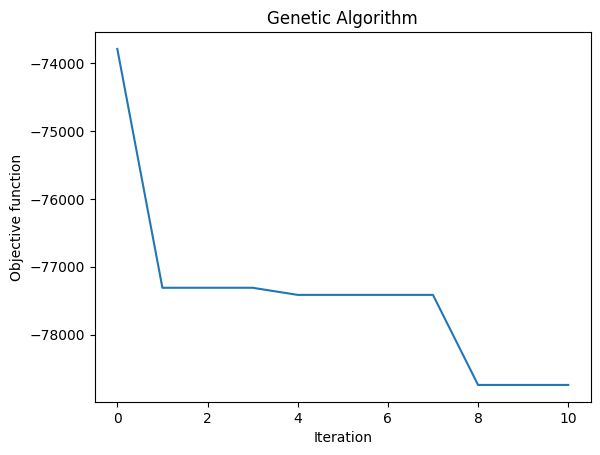

"\n[0. 0. 1. 0. ... 0.] -> Solução binária ótima encontrada pelo GA:\n# - '1' indica item selecionado (ex: produto incluído na mochila)\n# - '0' indica item excluído\n# Valor da função objetivo: -79978.0 (problema de minimização)\n\n"

In [74]:
model.run()

"""
[0. 0. 1. 0. ... 0.] -> Solução binária ótima encontrada pelo GA:
# - '1' indica item selecionado (ex: produto incluído na mochila)
# - '0' indica item excluído
# Valor da função objetivo: -79978.0 (problema de minimização)

"""

# Optimized operation

In [62]:
solution = data.iloc[model.output_dict['variable'].astype(bool),:]

In [75]:
"""
Imprime os resultados de um processo de otimização, incluindo:
- A solução encontrada (representada por um DataFrame ou estrutura similar).
- A quantidade final de itens na solução.
- O peso total dos itens na solução.
- O volume total dos itens na solução.
- O valor total dos itens na solução.

"""


print("\nResultados da Otimização:")
print(solution)
print(f"Final quantity: {len(solution)}")
print(f"Final Weight: {solution['PESO'].sum()}")
print(f"Final Vol: {solution['VOLUME'].sum()}")
print(f'Final Value: {solution['VALOR'].sum()}')



Resultados da Otimização:
    ID  PESO  VALOR  VOLUME
2    3   442   8487      26
6    7   315   6675      40
9   10   676   7936      50
10  11   255   4307      16
11  12   515   8568      23
12  13   545   4498      24
13  14   909   8542      32
14  15   178   5084      39
15  16   410   9620      16
17  18    57   6638      49
18  19   753   9623      20
Final quantity: 11
Final Weight: 5055
Final Vol: 335
Final Value: 79978
